In [1]:
import requests  # Importing the requests library to make API calls
import pandas as pd  # Importing pandas to create dataframes from our API data
import seaborn as sns
import matplotlib.pyplot as plt

# Function to get Pokémon data by its ID
def get_pokemon_data(pokemon_id):  
    api_url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_id}/"  # The API endpoint for Pokémon data
    response = requests.get(api_url)  # Making a GET request to the API endpoint
    return response.json()  # Returning the API response as JSON

pokemon_data = []  # Initializing an empty list to store Pokémon data

def get_pokemon_species_data(pokemon_id):
    api_url = f"https://pokeapi.co/api/v2/pokemon-species/{pokemon_id}/"  # The API endpoint for Pokémon species data
    response = requests.get(api_url)  # Make a GET request to the API endpoint
    return response.json()  # Return the API response as JSON
    
# Function to get evolution stage
def get_evolution_stage(species_data):
    # Fetch the evolution chain URL
    evolution_chain_url = species_data['evolution_chain']['url']
    evolution_chain_data = requests.get(evolution_chain_url).json()  # Fetch data from the API
    
    # Parse the chain to find the evolution stage
    current_stage = 1  # Start with the first stage
    chain = evolution_chain_data['chain']
    
    while chain:
        if chain['species']['name'] == species_data['name']:
            return current_stage  # Return the stage when the Pokémon matches
        chain = chain['evolves_to'][0] if chain['evolves_to'] else None
        current_stage += 1  # Increment stage for each evolution

    return current_stage

# Loop through Pokémon IDs from 1 to 151 (inclusive)
for pokemon_id in range(1, 152):  
    data = get_pokemon_data(pokemon_id)  # Fetch Pokémon data
    species_data = get_pokemon_species_data(pokemon_id)  # Fetch species data
    if data and species_data:  # Ensure both calls are successful
        name = data['name']
        weight = data['weight']
        HP = data['stats'][0]['base_stat']
        attack = data['stats'][1]['base_stat']
        defense = data['stats'][2]['base_stat']
        sp_attack = data['stats'][3]['base_stat']
        sp_defense = data['stats'][4]['base_stat']
        speed = data['stats'][5]['base_stat']
        
        # Get Pokémon type
        types = [t['type']['name'] for t in data['types']]
        
        # Calculate total stats
        total_stats = HP + attack + defense + sp_attack + sp_defense + speed
        
        # Get evolution stage
        evolution_stage = get_evolution_stage(species_data)
        
        # Append data to the list
        pokemon_data.append({
            'Name': name, 
            'Weight': weight, 
            'HP': HP,
            'Attack': attack, 
            'Defense': defense,
            'Sp. Attack': sp_attack,
            'Sp. Defense': sp_defense,
            'Speed': speed,
            'Total Stats': total_stats,
            'Type': types,
            'Evolution Stage': evolution_stage
        })

# Create a pandas DataFrame from the list of Pokémon data
df = pd.DataFrame(pokemon_data)

# Save the DataFrame as a CSV file
df.to_csv("generation1_pokemon.csv", index=False)  
# index=False ensures the index column is not included in the CSV file


/var/folders/66/94kbnw8n7b5cm2d6h1_ptt400000gn/T/ipykernel_37523/136953319.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=comparison_data, x='Category', y='Total Stats', palette='pastel')


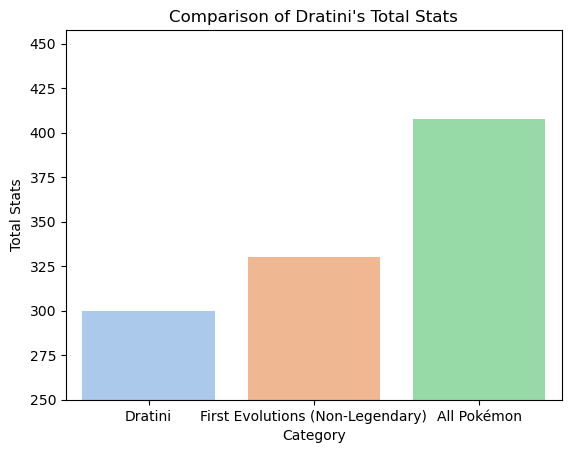

In [8]:
# Filter out legendary Pokémon and calculate averages
legendaries = ['mew', 'mewtwo', 'moltres', 'zapdos', 'articuno']
df_non_legendary = df[~df['Name'].str.lower().isin(legendaries)]  # Exclude legendaries

# Calculate the average stats for all Pokémon
average_total_all = df['Total Stats'].mean()

# Calculate the average stats for first-evolution Pokémon
average_total_first_evolution = df_non_legendary[df_non_legendary['Evolution Stage'] == 1]['Total Stats'].mean()

# Get Dratini's total stats
dratini_total_stats = df[df['Name'].str.lower() == 'dratini']['Total Stats'].values[0]

# Data for the bar chart
comparison_data = pd.DataFrame({
    'Category': ['Dratini', 'First Evolutions (Non-Legendary)', 'All Pokémon'],
    'Total Stats': [dratini_total_stats, average_total_first_evolution, average_total_all]
})

# Create the bar plot
sns.barplot(data=comparison_data, x='Category', y='Total Stats', palette='pastel')
plt.title("Comparison of Dratini's Total Stats")
plt.ylim(250, max(comparison_data['Total Stats']) + 50)
plt.show()


/var/folders/66/94kbnw8n7b5cm2d6h1_ptt400000gn/T/ipykernel_72079/1011045243.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



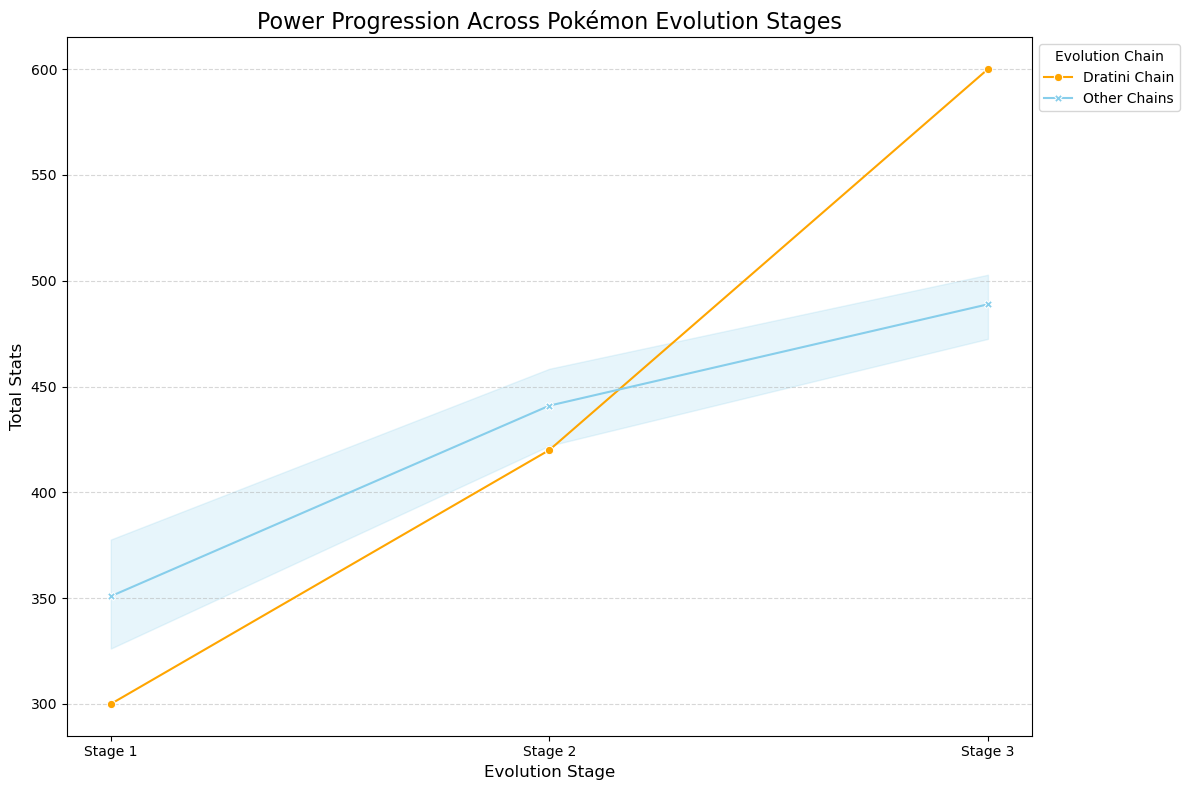

In [31]:
# Filtering the relevant columns: Name, Evolution Stage, Total Stats
df_evolution = df[['Name', 'Evolution Stage', 'Total Stats']]

# Adding a column for Evolution Chain based on the name (to group by evolutionary chain)
# Dratini, Dragonair, and Dragonite chain is an example of one chain to highlight.
highlight_chain = ['dratini', 'dragonair', 'dragonite']

# Add a column to mark the highlighted chain
df_evolution['Evolution Chain'] = df_evolution['Name'].apply(
    lambda x: 'Dratini Chain' if x.lower() in highlight_chain else 'Other Chains'
)

# Sort by Evolution Stage to ensure the progression is correct
df_evolution = df_evolution.sort_values(by=['Evolution Chain', 'Evolution Stage'])

# Plotting the data using seaborn for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 8))

# Plot all evolution chains
sns.lineplot(data=df_evolution, x='Evolution Stage', y='Total Stats', hue='Evolution Chain', 
             style='Evolution Chain', markers=True, dashes=False, palette=['orange', 'skyblue'])

# Add labels and title
plt.title("Power Progression Across Pokémon Evolution Stages", fontsize=16)
plt.xlabel("Evolution Stage", fontsize=12)
plt.ylabel("Total Stats", fontsize=12)
plt.xticks([1, 2, 3], labels=["Stage 1", "Stage 2", "Stage 3"])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title="Evolution Chain", loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


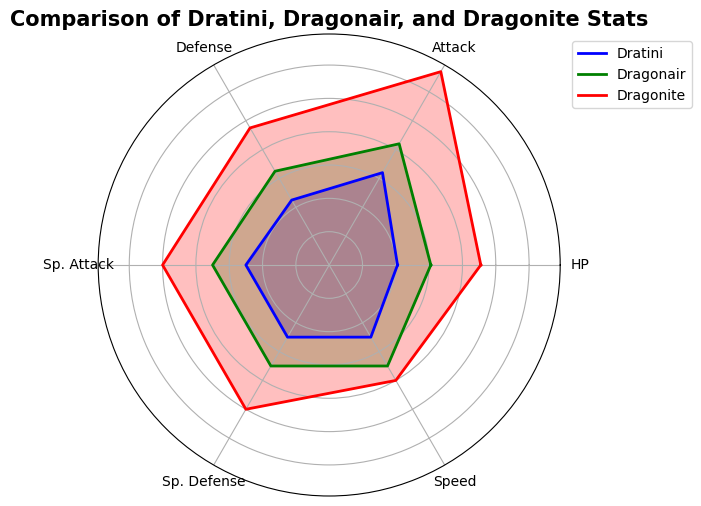

In [29]:
import numpy as np
# Prepare data for comparison on the same radar chart
dratini_values = [dratini_data['HP'], dratini_data['Attack'], dratini_data['Defense'], dratini_data['Sp. Attack'], dratini_data['Sp. Defense'], dratini_data['Speed']]
dragonair_values = [dragonair_data['HP'], dragonair_data['Attack'], dragonair_data['Defense'], dragonair_data['Sp. Attack'], dragonair_data['Sp. Defense'], dragonair_data['Speed']]
dragonite_values = [dragonite_data['HP'], dragonite_data['Attack'], dragonite_data['Defense'], dragonite_data['Sp. Attack'], dragonite_data['Sp. Defense'], dragonite_data['Speed']]

# Number of variables (stats)
num_vars = len(categories)

# Compute angle for each axis of the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Close the radar chart loop by repeating the first value
dratini_values += dratini_values[:1]
dragonair_values += dragonair_values[:1]
dragonite_values += dragonite_values[:1]
angles += angles[:1]

# Create a radar chart for comparison
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot the data for each Pokémon
ax.plot(angles, dratini_values, color='blue', linewidth=2, linestyle='solid', label='Dratini')
ax.fill(angles, dratini_values, color='blue', alpha=0.25)

ax.plot(angles, dragonair_values, color='green', linewidth=2, linestyle='solid', label='Dragonair')
ax.fill(angles, dragonair_values, color='green', alpha=0.25)

ax.plot(angles, dragonite_values, color='red', linewidth=2, linestyle='solid', label='Dragonite')
ax.fill(angles, dragonite_values, color='red', alpha=0.25)

# Set the labels for each axis
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add a title
plt.title("Comparison of Dratini, Dragonair, and Dragonite Stats", size=15, weight='bold')

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# Show the radar chart
plt.show()
